 # Análise de Vendas dos Cursos

Objetivos:

1. Calcular a receita total gerada pela venda dos cursos.

2. Identificar o curso com o maior número de vendas.

3. Visualizar a distribuição das vendas ao longo do tempo através de gráficos.

# Bibliotecas e Importação

In [3]:
import pandas as pd
import matplotlib.pyplot  as plt

In [4]:
dados = pd.read_csv('Vendas de Cursos Online - Página1.csv', sep="," )

In [18]:
dados.head(1)

,ID,Nome do Curso,Quantidade de Vendas,Preço Unitário,Data
0,1,Introdução à Programação em Python,50,39.9,2023-01-01


In [6]:
df = pd.DataFrame(dados)

In [7]:
df1=df

In [8]:
# Renomear a coluna
df1 = df1.rename(columns={'Nome do Curso': 'Curso'})
df1

,ID,Curso,Quantidade de Vendas,Preço Unitário,Data
0,1,Introdução à Programação em Python,50,39.9,2023-01-01
1,2,Desenvolvimento Web com HTML e CSS,30,59.9,2023-01-02
2,3,JavaScript Avançado: Frameworks e Bibliotecas,20,79.9,2023-01-03
3,4,Introdução ao Machine Learning,15,99.9,2023-01-04
4,5,Desenvolvimento Mobile com React Native,25,69.9,2023-01-05
5,6,Arquitetura de Microserviços,12,89.9,2023-01-06
6,7,Banco de Dados SQL e NoSQL,18,79.9,2023-01-07
7,8,Segurança da Informação: Fundamentos,10,109.9,2023-01-08
8,9,Cloud Computing com AWS,22,99.9,2023-01-09
9,10,DevOps: Integração e Entrega Contínua,8,119.9,2023-01-10


In [20]:
df1.isna().sum()#verificando se tem dados faltantes

ID                      0
Curso                   0
Quantidade de Vendas    0
Preço Unitário          0
Data                    0
Receita Total           0
dtype: int64

In [15]:
df1.describe()

,ID,Quantidade de Vendas,Preço Unitário,Receita Total
count,25.000000,25.000000,25.000000,25.000000
mean,13.000000,17.960000,83.900000,1309.404000
std,7.359801,10.921996,21.984843,412.195665
min,1.000000,5.000000,39.900000,549.500000
25%,7.000000,10.000000,69.900000,999.000000
50%,13.000000,15.000000,79.900000,1258.200000
75%,19.000000,20.000000,99.900000,1498.500000
max,25.000000,50.000000,119.900000,2197.800000


# 1.Calcular a receita total gerada pela venda dos cursos

In [9]:
df1['Receita Total'] = df1['Quantidade de Vendas'] * df['Preço Unitário']
receita_total = df1['Receita Total'].sum()
print(f"A receita total R$ {receita_total:.2f}")

A receita total R$ 32735.10


# 2.Identificar o curso com o maior número de vendas

In [10]:
curso_com_mais_vendas = df1.sort_values(by='Quantidade de Vendas', ascending=False).iloc[0]

print(f"O curso com o maior  vendas é {curso_com_mais_vendas['Curso']} com {curso_com_mais_vendas['Quantidade de Vendas']} vendas")

O curso com o maior  vendas é Introdução à Programação em Python com 50 vendas


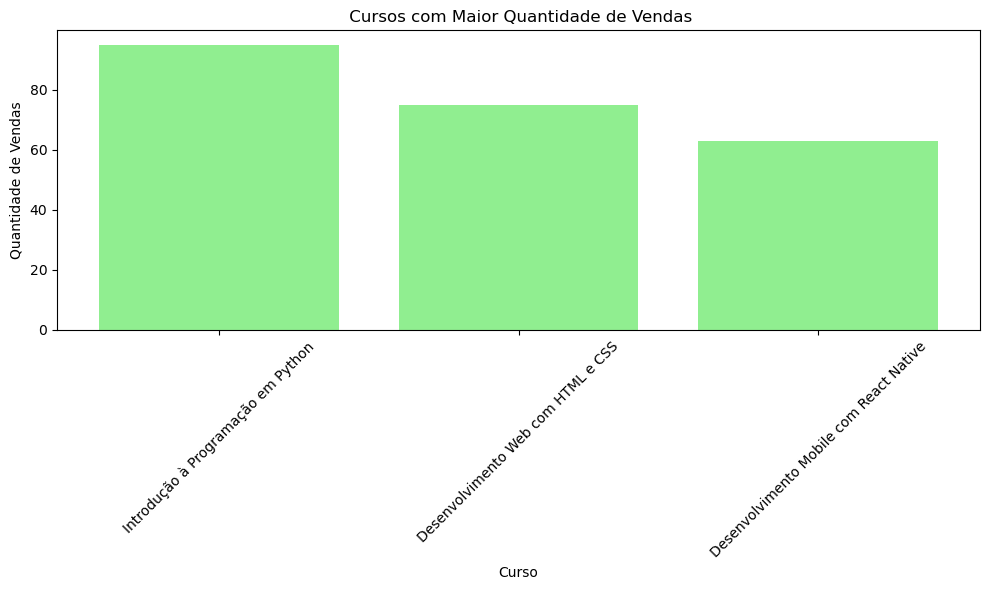

In [11]:
total_por_curso = df1.groupby('Curso')['Quantidade de Vendas'].sum().reset_index()#agrupando
total_por_curso = total_por_curso.sort_values(by='Quantidade de Vendas', ascending=False)# Ordenando em ordem decrescente
top_cursos = total_por_curso.head(3)
plt.figure(figsize=(10, 6))
plt.bar(top_cursos['Curso'], top_cursos['Quantidade de Vendas'], color='lightgreen')
plt.xlabel('Curso')
plt.ylabel('Quantidade de Vendas')
plt.title(' Cursos com Maior Quantidade de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3.Visualizar a distribuição das vendas ao longo do tempo através de gráficos

In [12]:
df1.dtypes

ID                        int64
Curso                    object
Quantidade de Vendas      int64
Preço Unitário          float64
Data                     object
Receita Total           float64
dtype: object

 a coluna 'Data' ainda está como tipo object em vez de datetime.

In [13]:
vendas = df1.groupby('Data')['Quantidade de Vendas'].sum().reset_index()

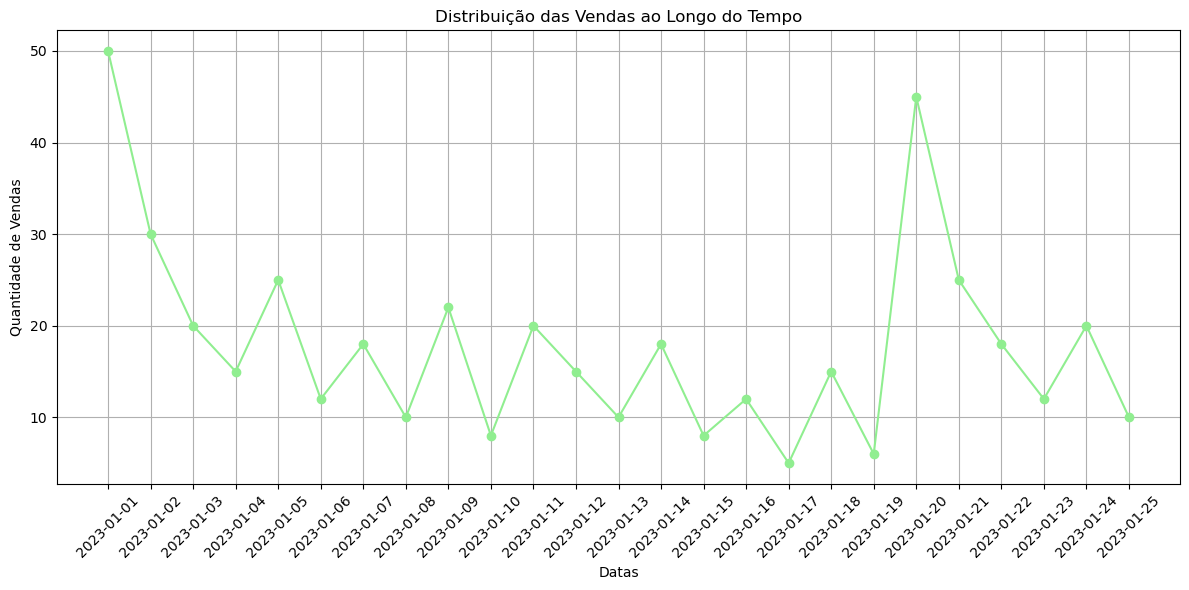

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(vendas['Data'], vendas['Quantidade de Vendas'], marker='o', linestyle='-', color='lightgreen')
plt.xlabel('Datas')
plt.ylabel('Quantidade de Vendas')
plt.title('Distribuição das Vendas ao Longo do Tempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()